<font size="6"><b>EDA</b></font>

<br>
<font size="3"><b>Import libraries</b></font>

In [1]:
# nltk
from nltk import FreqDist

# utilities
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preferences
pd.set_option('display.max_columns', None)
%matplotlib inline

<br>
<font size="3"><b>Read in dataset and display column and datatype info</b></font>
<br>
Dataset preprocessed via data_processing.ipynb

In [2]:
# read tsv dataset into pandas df
filename = 'amazon_reviews_us_Luggage_v1_00'

cols = ['TARGET',  #<---ratio of helpful votes to total votes above/below median 
        'STEM',     #<---lemmas or stemmas ['LEM' or 'STEM']
        'CHAR',    #<---number of characters
        'NUM',     #<---number of tokens
        'WORD',    #<---number of words
        'LEN',     #<---average sentence length
        'SENT',    #<---number of sentences
        'AVG',     #<---sentence length
        'INTERRO', #<---number of questionss
        'PER',     #<---percent questions
        'EXCLAM',  #<---number of exclamations
        'COUNT',   #<---number of exclamation points
        'CAPS',    #<---percentage of capitalized characters
        'MED',     #<---product's median star rating
        'FAV',     #<---reviewer's rating vs product's media
        'POP']     #<---number of product's review

df = pd.read_csv(f'data/{filename}_processed.csv',
                 usecols = cols)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 16 columns):
TARGET     12132 non-null int64
STEM       12132 non-null object
CHAR       12132 non-null int64
NUM        12132 non-null int64
WORD       12132 non-null int64
LEN        12132 non-null float64
SENT       12132 non-null int64
AVG        12132 non-null float64
INTERRO    12132 non-null int64
PER        12132 non-null float64
EXCLAM     12132 non-null int64
COUNT      12132 non-null int64
CAPS       12132 non-null float64
MED        12132 non-null float64
FAV        12132 non-null float64
POP        12132 non-null int64
dtypes: float64(6), int64(9), object(1)
memory usage: 1.5+ MB


<br>
<font size="3"><b>Preview dataframe</b></font>

In [4]:
df.head(3)

,TARGET,STEM,CHAR,NUM,WORD,LEN,SENT,AVG,INTERRO,PER,EXCLAM,COUNT,CAPS,MED,FAV,POP
0,0,"['strap', 'broke', 'suppos', 'anti', 'theft', ...",318,25,63,5.047619,6,10.500000,1,0.166667,2,3,0.031447,4.0,-3.0,15
1,0,"['product', 'absolut', 'beauti', 'order', 'lar...",437,39,80,5.462500,9,8.888889,1,0.111111,1,2,0.048055,5.0,0.0,1
2,0,"['review', 'iblu', 'overs', 'leather', 'canva'...",1951,193,351,5.558405,15,23.400000,1,0.066667,6,9,0.033316,5.0,0.0,1


<br>
<font size="3"><b>Step 1:</b> Most frequent words</font>

In [5]:
# helpful/unhelpful review vocabularies
helpful_review_vocab = [word for review in df[df.TARGET==1].STEM for word in eval(review)]
helpful_review_vocab_freqdist = FreqDist(helpful_review_vocab)

unhelpful_review_vocab = [word for review in df[df.TARGET==0].STEM for word in eval(review)]
unhelpful_review_vocab_freqdist = FreqDist(unhelpful_review_vocab)

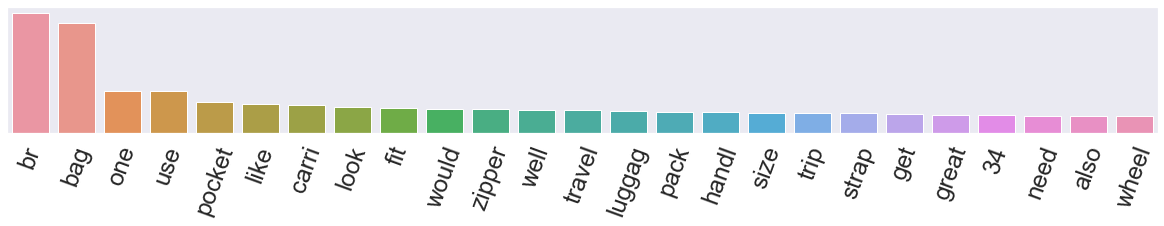

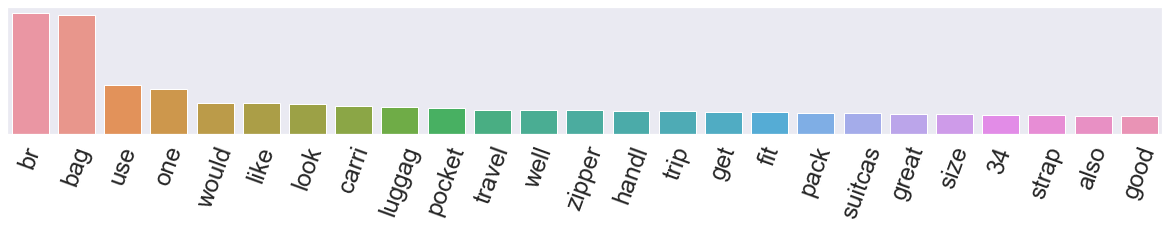

In [6]:
# helpful/unhelpful reviews' 25 most frequent tokens
x1 = [k for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y1 = [v for k, v in sorted(helpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
plt.figure(figsize=(18,3), facecolor='white')
sns.set(font_scale = 2.2)
sns.barplot(x=x1, y=y1)
plt.tight_layout()
plt.xticks(rotation=70)
plt.yticks([])
plt.savefig(fname='images/helpful_freqdist', bbox_inches='tight', pad_inches=.1)
plt.show()

x1 = [k for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
y1 = [v for k, v in sorted(unhelpful_review_vocab_freqdist.items(), key=lambda x: -x[1])][:25]
plt.figure(figsize=(18,3), facecolor='white')
sns.set(font_scale = 2.2)
sns.barplot(x=x1, y=y1)
plt.tight_layout()
plt.xticks(rotation=70)
plt.yticks([])
plt.savefig(fname='images/unhelpful_freqdist', bbox_inches='tight', pad_inches=.1)
plt.show()